In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
raw = pd.read_csv('test2.csv')
raw['datapoint'] = raw.index

In [159]:
#raw.head()

In [160]:
XP = raw.datapoint
curve = raw.CV
#XP = raw.iloc[:,[True, False]]
#curve = raw.iloc[:, [False, True]]
XParray = XP.to_numpy()
curvearray = curve.to_numpy()
xdata = XParray.flatten()
ydata = curvearray.flatten()
#ydata2 = ydata - 60

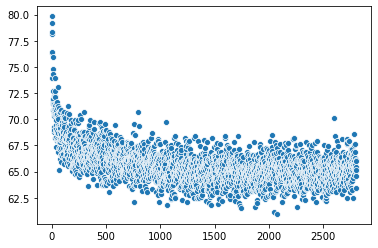

In [161]:
a = sns.scatterplot(x=xdata, y=ydata)

In [162]:
datalength = ydata.size
firstpoint = ydata[0]
ydata2 = ydata - firstpoint
offsetval = ydata2[datalength-1]
offsetval

-15.241729919999997

In [163]:
p0 = np.array([offsetval, 0.1])
def func(x, a, b):
    return a * (1-(np.exp(-b * x)))

In [164]:
#popt, pcov = curve_fit(func, xdata, ydata, bounds=(-110, [-100, 1]))
popt, pcov = curve_fit(func, xdata, ydata2, p0)

In [165]:
popt

array([-14.38579143,   0.02270066])

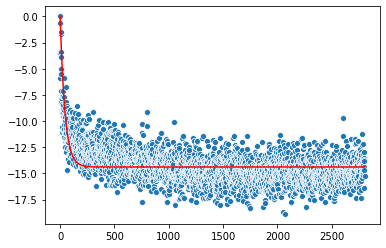

In [166]:
b = sns.scatterplot(x=xdata, y=ydata2)
b = sns.lineplot(x=xdata, y=func(xdata,*popt), color='red')